In [1]:
import numpy as np
import pandas as pd
import mglearn


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import  make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

from sklearn.datasets import load_wine,load_iris

와인데이터셋 이용
- train, test 나누기
- 정규화 하기
- 앙상블 이용하여 train,test (정확도,f1 score , confusion matrix)확인하기
- 부스팅 모델을 이용한 train,test (정확도,f1 score , confusion matrix)확인하기

In [2]:
wine = load_wine()

x=wine.data
y=wine.target
x_train, x_test, y_train, y_test =train_test_split( x, y,test_size=0.2, stratify=y)


In [3]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]], shape=(178, 13)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [4]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [13]:
logistic = LogisticRegression( max_iter=500)
knn = KNeighborsClassifier( n_neighbors=5 )
tree = DecisionTreeClassifier(min_samples_leaf=5)

model_vc = VotingClassifier( [('logistic',logistic),('knn',knn),('tree',tree)],
                                voting='soft')
model_rfc = RandomForestClassifier(n_estimators=100)
model_lgb = LGBMClassifier(
)

In [14]:
model_vc.fit(x_train,y_train)
model_rfc.fit(x_train,y_train)
model_lgb.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 514
[LightGBM] [Info] Number of data points in the train set: 142, number of used features: 13
[LightGBM] [Info] Start training from score -1.105679
[LightGBM] [Info] Start training from score -0.912776
[LightGBM] [Info] Start training from score -1.318241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


train 정확도 0.9859154929577465 test 정확도 0.9722222222222222
train 정밀도 0.984508547008547 test 정밀도 0.9696969696969697
train 재현율 0.9883040935672515 test 재현율 0.9761904761904763
train f1 score 0.9862098427887901 test f1 score 0.9717813051146384


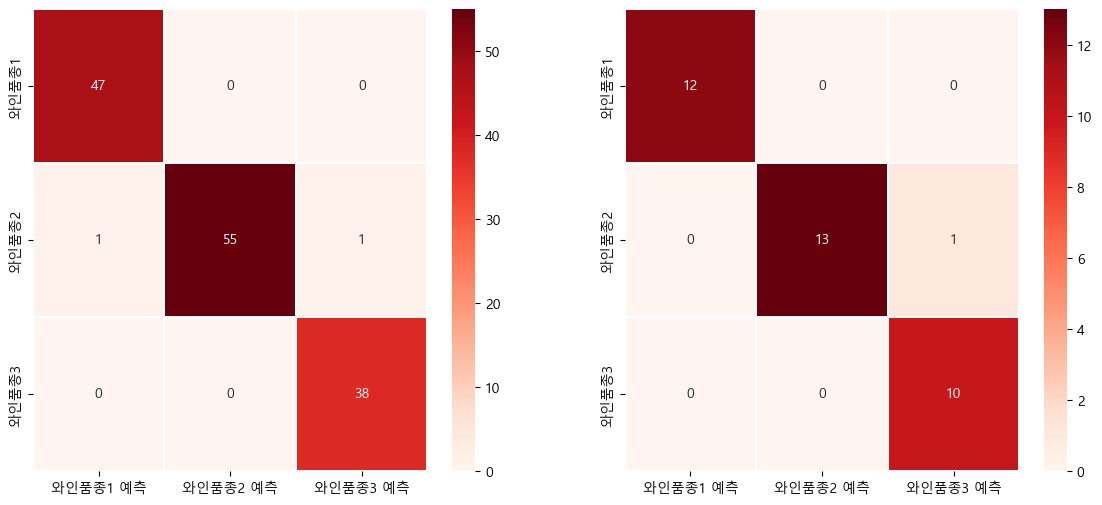

In [7]:
pred_train=model_vc.predict(x_train)
pred_test=model_vc.predict(x_test)

print('train 정확도', accuracy_score(y_train, pred_train) ,'test 정확도', accuracy_score(y_test, pred_test))
print('train 정밀도', precision_score(y_train, pred_train, average='macro'), 'test 정밀도', precision_score(y_test, pred_test, average='macro'))
print('train 재현율', recall_score(y_train, pred_train,average='macro'),'test 재현율', recall_score(y_test, pred_test,average='macro') )
print('train f1 score', f1_score(y_train, pred_train,average='macro'),'test f1 score', f1_score(y_test, pred_test,average='macro')  )


c=confusion_matrix(y_train,pred_train)
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sb.heatmap( c, annot=True, fmt='d',linewidths=0.2, cmap='Reds',
           xticklabels=['와인품종1 예측','와인품종2 예측','와인품종3 예측'],
           yticklabels=['와인품종1','와인품종2','와인품종3']
           )
c=confusion_matrix(y_test,pred_test)
plt.subplot(1,2,2)
sb.heatmap( c, annot=True, fmt='d',linewidths=0.2, cmap='Reds',
           xticklabels=['와인품종1 예측','와인품종2 예측','와인품종3 예측'],
           yticklabels=['와인품종1','와인품종2','와인품종3']
           )

plt.show()

train 정확도 1.0 test 정확도 1.0
train 정밀도 1.0 test 정밀도 1.0
train 재현율 1.0 test 재현율 1.0
train f1 score 1.0 test f1 score 1.0


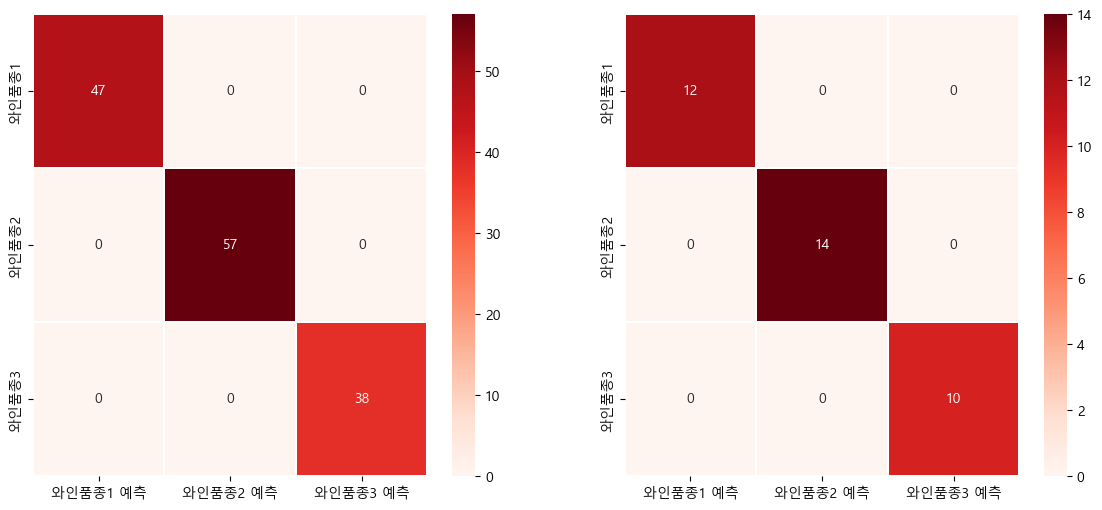

In [8]:
pred_train=model_rfc.predict(x_train)
pred_test=model_rfc.predict(x_test)

print('train 정확도', accuracy_score(y_train, pred_train) ,'test 정확도', accuracy_score(y_test, pred_test))
print('train 정밀도', precision_score(y_train, pred_train, average='macro'), 'test 정밀도', precision_score(y_test, pred_test, average='macro'))
print('train 재현율', recall_score(y_train, pred_train,average='macro'),'test 재현율', recall_score(y_test, pred_test,average='macro') )
print('train f1 score', f1_score(y_train, pred_train,average='macro'),'test f1 score', f1_score(y_test, pred_test,average='macro')  )


c=confusion_matrix(y_train,pred_train)
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sb.heatmap( c, annot=True, fmt='d',linewidths=0.2, cmap='Reds',
           xticklabels=['와인품종1 예측','와인품종2 예측','와인품종3 예측'],
           yticklabels=['와인품종1','와인품종2','와인품종3']
           )
c=confusion_matrix(y_test,pred_test)
plt.subplot(1,2,2)
sb.heatmap( c, annot=True, fmt='d',linewidths=0.2, cmap='Reds',
           xticklabels=['와인품종1 예측','와인품종2 예측','와인품종3 예측'],
           yticklabels=['와인품종1','와인품종2','와인품종3']
           )

plt.show()

c:\Users\Dell5371\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell5371\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


train 정확도 1.0 test 정확도 1.0
train 정밀도 1.0 test 정밀도 1.0
train 재현율 1.0 test 재현율 1.0
train f1 score 1.0 test f1 score 1.0


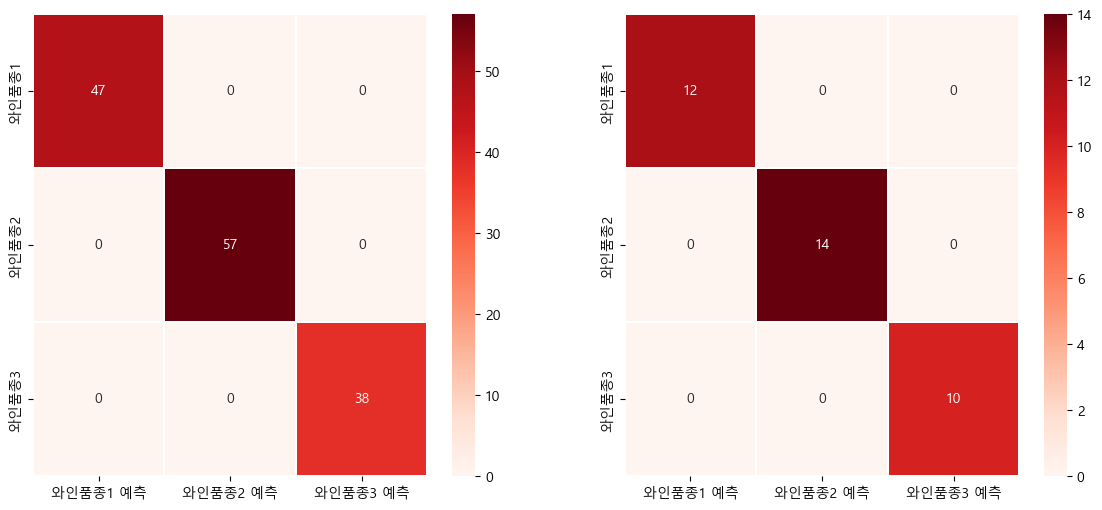

In [15]:
pred_train=model_lgb.predict(x_train)
pred_test=model_lgb.predict(x_test)

print('train 정확도', accuracy_score(y_train, pred_train) ,'test 정확도', accuracy_score(y_test, pred_test))
print('train 정밀도', precision_score(y_train, pred_train, average='macro'), 'test 정밀도', precision_score(y_test, pred_test, average='macro'))
print('train 재현율', recall_score(y_train, pred_train,average='macro'),'test 재현율', recall_score(y_test, pred_test,average='macro') )
print('train f1 score', f1_score(y_train, pred_train,average='macro'),'test f1 score', f1_score(y_test, pred_test,average='macro')  )


c=confusion_matrix(y_train,pred_train)
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sb.heatmap( c, annot=True, fmt='d',linewidths=0.2, cmap='Reds',
           xticklabels=['와인품종1 예측','와인품종2 예측','와인품종3 예측'],
           yticklabels=['와인품종1','와인품종2','와인품종3']
           )
c=confusion_matrix(y_test,pred_test)
plt.subplot(1,2,2)
sb.heatmap( c, annot=True, fmt='d',linewidths=0.2, cmap='Reds',
           xticklabels=['와인품종1 예측','와인품종2 예측','와인품종3 예측'],
           yticklabels=['와인품종1','와인품종2','와인품종3']
           )

plt.show()

iris 데이터 셋 이용
- 군집화 하기
- 정답과 군집화값 정확도 확인하기

In [10]:
iris = load_iris( as_frame=True)
x_data = iris['data']
y_data = iris['target']
df = pd.DataFrame(x_data, columns=iris.feature_names)
df['target']=y_data

In [11]:
k = KMeans( n_clusters=3 )
km = k.fit( df)

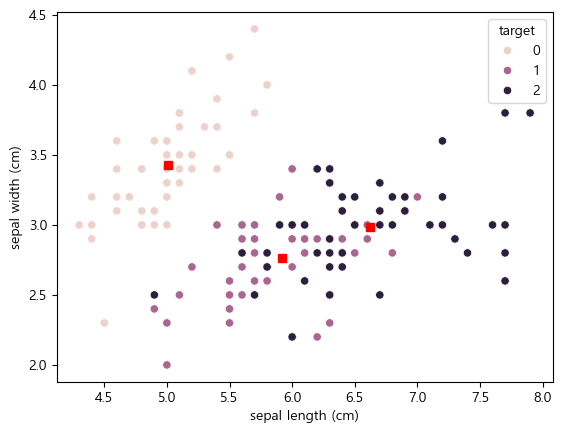

In [12]:
sb.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)',hue='target')
for a,b,c,d,e in km.cluster_centers_:
    plt.plot( a,b, 'rs')
plt.show()